<a href="https://colab.research.google.com/github/Rahul-designs/Python-Projects/blob/main/RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance


     |████████████████████████████████| 6.3MB 9.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=86df6d75a2580ea9e8c06cf725e6f997c3b71fadf494940507b326eca9390088
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install mplfinance

     |████████████████████████████████| 71kB 4.6MB/s 


**Relative Strength Index (RSI)** :- Tells us the relative strength of the asset 

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
pd.options.mode.chained_assignment =None


In [ ]:
spy=yf.download('SPY')
spy.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.884184,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,26.068277,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,26.123499,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.399649,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.510111,531500


In [ ]:
# RSI = 100 - 100/(1 + Avg Gain/Avg Loss)
#[(Previous avg. gain)*13)+ current gain)]/14.
# Using n = 14 days

def RSI(data, window=14, adjust=False):
    #diff(will find the difference between two data points directly next to each other
    #dropna(to remove null values eg: weekends and holidays)
    delta = data['Adj Close'].diff(1).dropna()
    loss = delta.copy()
    gains = delta.copy()

    gains[gains<0] = 0
    loss[loss>0] = 0
    #ewm calculates exponential moving average for gain and loss
    gain_ewm = gains.ewm(com=window-1, adjust=adjust).mean()
    loss_ewm = abs(loss.ewm(com=window-1, adjust=adjust).mean())

    RS = gain_ewm / loss_ewm
    RSI = 100 - 100/(1 + RS)
    
    return RSI

rsi = RSI(spy)

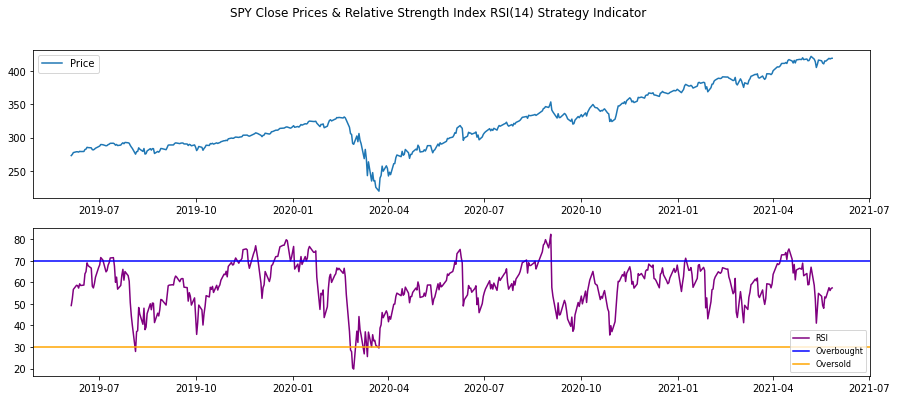

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 6))
ax[0].plot(spy['Adj Close'][-500:], label='Price')
ax[1].plot(rsi[-500:], label='RSI', c='purple')
ax[1].axhline(y=70, c='blue', label='Overbought')
ax[1].axhline(y=30, c='orange', label='Oversold')
plt.suptitle('SPY Close Prices & Relative Strength Index RSI(14) Strategy Indicator')
ax[0].legend()
ax[1].legend(loc='lower right', fontsize=8)


In [ ]:
tickers=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers=tickers.Symbol.to_list()
print(tickers)


['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE'

In [ ]:
tickers =[i.replace('.','-')for i in tickers]
print(tickers)


['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE'

**Condition**:- the stock price is above its 200 day moving average

for **BUYING** : 10 period RSI of the particular stock is below 30

--->> Buy on next day's open

for **SELLING** : 10 period RSI of the particular stock is above 40 OR after 10 trading days

---> sell on the next day open


**Testing STRATEGY:-** Testing this on all S & P 500 Stocks

In [ ]:
def RSIcalc(asset):
    df=yf.download(asset,start='2011-01-01')
    df['MA200']=df['Adj Close'].rolling(window=200).mean()
    df['price change']=df['Adj Close'].pct_change() #pct_change() function calculates the percentage change between the current and a prior days(daily returns)
    df['upmove']=df['price change'].apply(lambda x: x if x > 0 else 0)
    df['downmove']=df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['avg up']=df['upmove'].ewm(span=19).mean()
    df['avg down']=df['downmove'].ewm(span=19).mean()
    df=df.dropna() #for first 200 days moving average value is NAN
    df['RS']=df['avg up']/df['avg down']
    df['RSI']=df['RS'].apply(lambda x: 100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI']< 30), 'Buy']= 'Yes'
    df.loc[(df['Adj Close'] < df['MA200'])| (df['RSI'] > 30),'Buy']= 'No'

    return df

RSIcalc(tickers[0])

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA200,price change,upmove,downmove,avg up,avg down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2011-10-17,78.629997,79.050003,75.660004,75.879997,58.104897,4359500,67.069641,-0.038155,0.000000,0.038155,0.010029,0.010096,0.993422,49.835013,No
2011-10-18,76.180000,79.150002,75.709999,78.360001,60.003960,4167200,67.043486,0.032683,0.032683,0.000000,0.012295,0.009086,1.353122,57.503273,No
2011-10-19,78.260002,78.860001,77.269997,77.699997,59.498554,3865000,67.015254,-0.008423,0.000000,0.008423,0.011065,0.009020,1.226767,55.091845,No
2011-10-20,77.769997,79.059998,77.110001,78.680000,60.248985,4087300,66.990775,0.012613,0.012613,0.000000,0.011220,0.008118,1.382134,58.020832,No
2011-10-21,79.379997,80.559998,78.980003,80.480003,61.627331,5125200,66.975180,0.022877,0.022877,0.000000,0.012386,0.007306,1.695260,62.897834,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-21,201.710007,203.759995,201.080002,201.860001,201.860001,1531500,174.045145,0.001041,0.001041,0.000000,0.004643,0.003693,1.257431,55.701857,No
2021-05-24,202.800003,203.520004,201.919998,202.610001,202.610001,1529200,174.303675,0.003715,0.003715,0.000000,0.004551,0.003323,1.369224,57.792094,No
2021-05-25,202.850006,203.000000,201.369995,201.710007,201.710007,1519400,174.546437,-0.004442,0.000000,0.004442,0.004096,0.003435,1.192180,54.383300,No


In [ ]:
def getSignals(df):
    Buying_dates =[]
    Selling_dates=[]

    for i in range(len(df)-11):
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)#buying the asset on the next day when the yes signal is generated
            for j in range(1,11):
                if df['RSI'].iloc[i+j] > 40:
                    Selling_dates.append(df.iloc[i+j+1].name)#when the asset crossed 40 RSI within the span of 10 days we sell the asset on next day
                    break
                elif j == 10:
                    Selling_dates.append(df.iloc[i+j+1].name)#else after 10 days we just sell the asset
    return Buying_dates,Selling_dates

In [ ]:
frame=RSIcalc(tickers[0])
buy,sell=getSignals(frame)
print(buy)

[*********************100%***********************]  1 of 1 completed
[Timestamp('2012-03-07 00:00:00'), Timestamp('2012-04-11 00:00:00'), Timestamp('2012-05-15 00:00:00'), Timestamp('2012-05-16 00:00:00'), Timestamp('2012-05-18 00:00:00'), Timestamp('2012-05-21 00:00:00'), Timestamp('2012-06-05 00:00:00'), Timestamp('2012-06-06 00:00:00'), Timestamp('2012-10-24 00:00:00'), Timestamp('2012-10-25 00:00:00'), Timestamp('2013-08-22 00:00:00'), Timestamp('2014-01-27 00:00:00'), Timestamp('2014-01-28 00:00:00'), Timestamp('2014-01-29 00:00:00'), Timestamp('2014-01-31 00:00:00'), Timestamp('2014-02-03 00:00:00'), Timestamp('2014-02-04 00:00:00'), Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-04 00:00:00'), Timestamp('2014-08-06 00:00:00'), Timestamp('2014-08-07 00:00:00'), Timestamp('2014-08-08 00:00:00'), Timestamp('2014-10-02 00:00:00'), Timestamp('2014-10-03 00:00:00'), Timestamp('2015-04-30 00:00:00'), Timestamp('2015-05-01 00:00:00'), Timestamp('2016-10-12 00:00:00'), Timestamp('2

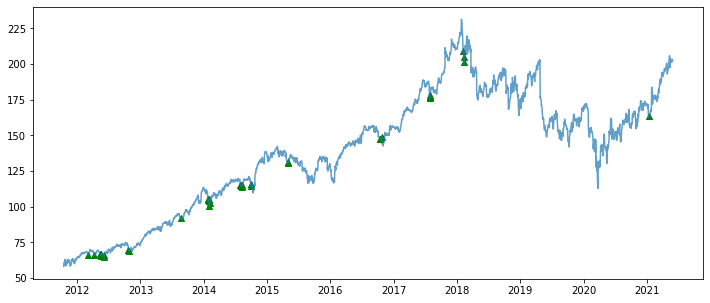

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index,frame.loc[buy]['Adj Close'],marker='^',c='g')
plt.plot(frame['Adj Close'],alpha=0.7)

In [ ]:
Profits=(frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
print(Profits)

[ 0.01841858  0.01323802 -0.0115183  -0.01105814  0.00212315  0.01287556
  0.03632401  0.02847867  0.01033357  0.01558087  0.01012236 -0.00346098
  0.00108178 -0.00407378  0.02345979  0.01052883  0.02759942  0.00556546
  0.00556546  0.01286469  0.0062834   0.01170129  0.01861865  0.01306246
  0.0130085   0.01320242 -0.00076654  0.00355307 -0.01841872  0.01366927
  0.02033747  0.01195283  0.01595001  0.00852711  0.02154845  0.00861573
  0.01892706]


In [ ]:
wins=[i for i in Profits if i > 0]
print((len(wins)/len(Profits) )* 100, '%')
len(Profits)

83.78378378378379 %


37

In [ ]:
signals=[]
matrixprofits=[]
for i in range(len(tickers)):
    frame=RSIcalc(tickers[i])
    buy,sell=getSignals(frame)
    Profits=(frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
    signals.append(buy)
    matrixprofits.append(Profits)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

71.19192185850054 %


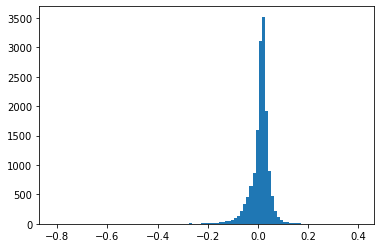

In [ ]:
allprofits = [ ] #for calculating all profits
for i in matrixprofits:
    for j in i:
        allprofits.append(j)
wins=[i for i in allprofits if i > 0]
print((len(wins)/len(allprofits) )* 100, '%')
plt.hist(allprofits,bins=100)
plt.show()


In [ ]:
for i in signals:
    for j in i:
        if j.year==2021:
            print(j)

2021-01-12 00:00:00
2021-03-05 00:00:00
2021-03-09 00:00:00
2021-05-05 00:00:00
2021-01-28 00:00:00
2021-05-06 00:00:00
2021-05-07 00:00:00
2021-05-10 00:00:00
2021-05-11 00:00:00
2021-05-12 00:00:00
2021-05-13 00:00:00
2021-03-05 00:00:00
2021-02-19 00:00:00
2021-03-04 00:00:00
2021-03-05 00:00:00
2021-03-09 00:00:00
2021-02-01 00:00:00
2021-02-17 00:00:00
2021-04-21 00:00:00
2021-04-23 00:00:00
2021-04-21 00:00:00
2021-04-23 00:00:00
2021-02-23 00:00:00
2021-02-25 00:00:00
2021-02-26 00:00:00
2021-01-27 00:00:00
2021-01-28 00:00:00
2021-01-28 00:00:00
2021-02-26 00:00:00
2021-01-28 00:00:00
2021-02-23 00:00:00
2021-02-24 00:00:00
2021-02-25 00:00:00
2021-02-26 00:00:00
2021-03-01 00:00:00
2021-03-09 00:00:00
2021-05-13 00:00:00
2021-05-13 00:00:00
2021-02-23 00:00:00
2021-02-24 00:00:00
2021-02-25 00:00:00
2021-02-26 00:00:00
2021-03-01 00:00:00
2021-03-04 00:00:00
2021-03-05 00:00:00
2021-03-08 00:00:00
2021-03-09 00:00:00
2021-01-28 00:00:00
2021-02-19 00:00:00
2021-01-28 00:00:00
